# Music Preferences: How Can it Help Spotify Advertise Better?

Spotify is known for targeting their customers with ads based on a customer's listening habits. A start-up music platform called 'Tao's Tempo' is trying to collect sponsorship to allow their business to grow. They are currently in phase 2 of their start-up and would like to begin making money, based on sponsor ads. 'Tao's Tempo' reached out to our company TM3 for assistance with their target ad campaign. TM3 has experience working with big names, like Spotify, to help pinpoint their marketing campaigns. 'Tao's Tempo' is looking for better ways to target adolescences based on the type of music they listen to, in order to help grow their new business. Without the targeting marketing help of TM3, 'Tao's Tempo' fears that their new music platform service will not survive. TM3 is happy to work with 'Tao's Tempo', as they are a young entrepreneurs looking to head into the big market of music.

### **Research Questions**
1. How does our data on music preference compare to Billboards?
2. Does a person's preference for Pop, Rock, HipHop/Rap, Latin and Techno music differ based on their gender?
3. Does a person's preference for Pop, Rock, HipHop/Rap, Latin and Techno music differ based on their age?
4. Can a person's preference for Pop, Rock, HipHop/Rap, Latin and Techno music determine their preference for Action, Animated, SciFi, Romantic, Comedy movies?
5. Can a person's spending habits influence their preference for Pop, Rock, HipHop/Rap, Latin and Techno music?
6. Can a person's living environment affect their preference for Pop, Rock, HipHop/Rap, Latin and Techno music?

### **Data Source**
The data used for this analysis was taken from *Young Peoples Survey* on **Kaggle**. This dataset explores the preferences, interests, habits, and opinions of students. 

### **Data Key**
| Feature Name | Definition | Key |
| ------------ | ---------- | --- |
| Music | _I enjoy listening to music._ | __Strongly disagree 1-2-3-4-5 Strongly agree__ |
| Slow songs or fast songs | _Music I prefer_ | __Slow paced music 1-2-3-4-5 Fast paced music__ |
| Pop | _Pop music_ | __Don't enjoy at all 1-2-3-4-5 Enjoy very much__ | 
| Rock | _Rock music_ | __Don't enjoy at all 1-2-3-4-5 Enjoy very much__ |
| Hiphop, rap | _Hip Hop/ Rap music_ | __Don't enjoy at all 1-2-3-4-5 Enjoy very much__ |
| Latino | _Latino music_ | __Don't enjoy at all 1-2-3-4-5 Enjoy very much__ |
| Techno, Trance | _Techno, Trance music_ | __Don't enjoy at all 1-2-3-4-5 Enjoy very much__ |
| Comedy | _Comedy movie_ | __Don't enjoy at all 1-2-3-4-5 Enjoy very much__ |
| Romantic | _Romantic movie_ | __Don't enjoy at all 1-2-3-4-5 Enjoy very much__ |
| Sci-fi | _Sci-fi movie_ | __Don't enjoy at all 1-2-3-4-5 Enjoy very much__ |
| Animated | _Animated movie_ | __Don't enjoy at all 1-2-3-4-5 Enjoy very much__ |
| Action | _Action movie_ | __Don't enjoy at all 1-2-3-4-5 Enjoy very much__ |
| Finances | _I save all the money I can_ | __Strongly disagree 1-2-3-4-5 Strongly agree__ |
| Shopping Centers | _I enjoy going to large shopping centres._ | __Strongly disagree 1-2-3-4-5 Strongly agree__ | 
| Entertainment spending| _I spend a lot of money on partying and socializing._ | __Strongly disagree 1-2-3-4-5 Strongly agree__ |
| Spending on Looks | _I spend a lot of money on my appearance._ | __Strongly disagree 1-2-3-4-5 Strongly agree__ |
| Spending on Gadgets | _I spend a lot of money on gadgets._ | __Strongly disagree 1-2-3-4-5 Strongly agree__ |
| Age | _Age_ | __Number__ |
| Gender | _Female or Male_ | __Female - Male__ |
| Village-town | _I spent most of my childhood in a..._ | __City - village__ |


### **Graph Key**
_Pop Music_: Salmon<br>
_Rock Music_: Doger Blue<br>
_Techno/Trance_: Lime<br>
_Hip Hop/Rap_: Yellow<br>
_Latino_: Red<br>
_Male_: Blue<br>
_Female_: Pink<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### **Import Data**

In [2]:
#Import original dataset-Research
research = pd.read_csv("research_final.csv")
research.head()

,Music,Slow_songs_or_fast_songs,Pop,Rock,Hiphop_Rap,Latino,Techno_Trance,Comedy,Romantic,Sci-fi,...,Folk,Country,Classical_music,Musical,Metal_or_Hardrock,Punk,Opera,Movies,Horror,Thriller
0,5,3,5,5,1,1,1,5,4,4,...,1,2,2,1,1,1,1,5,4,2
1,4,4,3,5,1,2,1,4,3,4,...,1,1,1,2,4,4,1,5,2,2
2,5,5,3,5,1,5,1,4,2,4,...,2,3,4,5,3,4,3,5,3,4
3,5,3,5,3,5,4,2,5,2,3,...,3,2,4,3,1,2,2,5,4,4
4,5,3,2,5,4,3,1,5,2,3,...,3,2,3,3,5,3,3,5,5,5


In [3]:
#Make copy of original dataset to make changes
research2 = research.copy()
research2.head()

,Music,Slow_songs_or_fast_songs,Pop,Rock,Hiphop_Rap,Latino,Techno_Trance,Comedy,Romantic,Sci-fi,...,Folk,Country,Classical_music,Musical,Metal_or_Hardrock,Punk,Opera,Movies,Horror,Thriller
0,5,3,5,5,1,1,1,5,4,4,...,1,2,2,1,1,1,1,5,4,2
1,4,4,3,5,1,2,1,4,3,4,...,1,1,1,2,4,4,1,5,2,2
2,5,5,3,5,1,5,1,4,2,4,...,2,3,4,5,3,4,3,5,3,4
3,5,3,5,3,5,4,2,5,2,3,...,3,2,4,3,1,2,2,5,4,4
4,5,3,2,5,4,3,1,5,2,3,...,3,2,3,3,5,3,3,5,5,5


In [4]:
#Delete out extra columns not pertaining to research questions.
research2.drop(research2.columns[21:], axis=1, inplace=True)
research2.head()

,Music,Slow_songs_or_fast_songs,Pop,Rock,Hiphop_Rap,Latino,Techno_Trance,Comedy,Romantic,Sci-fi,...,Action,Finances,Shopping_centres,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Age,Gender,Education,Village-town
0,5,3,5,5,1,1,1,5,4,4,...,2,3,4,3,3,1,20,female,college/bachelor degree,village
1,4,4,3,5,1,2,1,4,3,4,...,4,3,4,4,2,5,19,female,college/bachelor degree,city
2,5,5,3,5,1,5,1,4,2,4,...,1,2,4,4,3,4,20,female,secondary school,city
3,5,3,5,3,5,4,2,5,2,3,...,4,4,3,3,3,2,20,female,secondary school,village
4,5,3,2,5,4,3,1,5,2,3,...,4,2,3,3,1,4,20,male,secondary school,city


In [5]:
# Changing value names from int to object
# 1 & 2: dislike
# 3: netural
# 4 & 5: like

# Pop
research2['Pop']=research2['Pop'].astype(str)
# research2.dtypes --> make sure type was changed correctly
Pop_dict={'1': 'dislike', '2':'dislike', '3':'neutral', '4':'like', '5':'like'}
research2['Pop']=research2['Pop'].map(Pop_dict)


# Rock
research2['Rock']=research2['Rock'].astype(str)
# research2.dtypes --> make sure type was changed correctly
Rock_dict={'1': 'dislike', '2':'dislike', '3':'neutral', '4':'like', '5':'like'}
research2['Rock']=research2['Rock'].map(Rock_dict)


# Hiphop,Rap
research2['Hiphop_Rap']=research2['Hiphop_Rap'].astype(str)
# research2.dtypes --> make sure type was changed correctly
Hiphop_dict={'1': 'dislike', '2':'dislike', '3':'neutral', '4':'like', '5':'like'}
research2['Hiphop_Rap']=research2['Hiphop_Rap'].map(Hiphop_dict)


# Latino
research2['Latino']=research2['Latino'].astype(str)
# research2.dtypes --> make sure type was changed correctly
Latino_dict={'1': 'dislike', '2':'dislike', '3':'neutral', '4':'like', '5':'like'}
research2['Latino']=research2['Latino'].map(Latino_dict)


# Techno,Trance
research2['Techno_Trance']=research2['Techno_Trance'].astype(str)
# research2.dtypes --> make sure type was changed correctly
Techno_dict={'1': 'dislike', '2':'dislike', '3':'neutral', '4':'like', '5':'like'}
research2['Techno_Trance']=research2['Techno_Trance'].map(Techno_dict)
research2

,Music,Slow_songs_or_fast_songs,Pop,Rock,Hiphop_Rap,Latino,Techno_Trance,Comedy,Romantic,Sci-fi,...,Action,Finances,Shopping_centres,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Age,Gender,Education,Village-town
0,5,3,like,like,dislike,dislike,dislike,5,4,4,...,2,3,4,3,3,1,20,female,college/bachelor degree,village
1,4,4,neutral,like,dislike,dislike,dislike,4,3,4,...,4,3,4,4,2,5,19,female,college/bachelor degree,city
2,5,5,neutral,like,dislike,like,dislike,4,2,4,...,1,2,4,4,3,4,20,female,secondary school,city
3,5,3,like,neutral,like,like,dislike,5,2,3,...,4,4,3,3,3,2,20,female,secondary school,village
4,5,3,dislike,like,like,neutral,dislike,5,2,3,...,4,2,3,3,1,4,20,male,secondary school,city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,5,3,neutral,neutral,like,dislike,like,5,3,4,...,3,4,3,4,4,4,22,male,secondary school,city
670,5,2,like,like,like,neutral,neutral,4,5,4,...,4,3,5,3,4,3,20,female,secondary school,city
671,4,3,neutral,like,neutral,dislike,dislike,3,5,2,...,3,1,2,2,2,2,18,female,secondary school,city
672,5,3,neutral,like,dislike,dislike,dislike,5,3,1,...,4,3,2,5,3,3,25,female,college/bachelor degree,city


### **Research Question 1**
How does our data on music preference compare to Billboards?









<img src = './img1.png' />


Pop popularity:  344
Rock popularity:  431
Techno/Trance popularity:  141
Hiphop/Rap popularity:  249
Latino popularity:  211


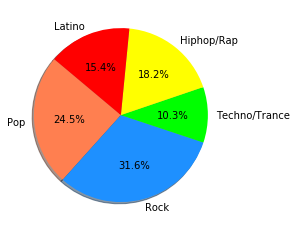

In [6]:
# Popularity of Music Generes 
#Pie Chart: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
#Rock and Pop are the most popular

labels = 'Pop', 'Rock', 'Techno/Trance', 'Hiphop/Rap','Latino'

#count the number of likes for each genre
print("Pop popularity: ",(research2.Pop=='like').sum())
print("Rock popularity: ",(research2.Rock=='like').sum())
print("Techno/Trance popularity: ",(research2.Techno_Trance=='like').sum())
print("Hiphop/Rap popularity: ",(research2.Hiphop_Rap=='like').sum())
print("Latino popularity: ",(research2.Latino=='like').sum())

#use numbers obtained to create the pie chart
sizes = [334, 431,141,249,211]
colors = ['coral', 'dodgerblue','lime','yellow','red']

#Plot pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.show()

### **Research Question 2**
Does a person's preference for Pop, Rock, HipHop/Rap, Latin and Techno music differ based on their gender?

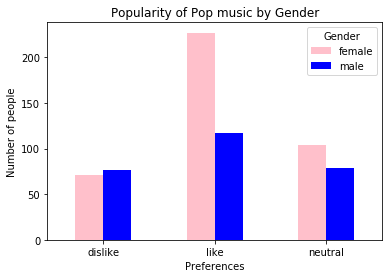

In [7]:
#Gender and music preferences
#Gender and Pop
gender_v_pop =research2.groupby(['Pop', 'Gender'])['Pop'].count().unstack('Gender').plot(kind='bar', color=["pink","blue"])

# adding labels
plt.title('Popularity of Pop music by Gender')
plt.ylabel('Number of people')
plt.xlabel('Preferences')
plt.xticks(rotation='horizontal')

gender_v_pop

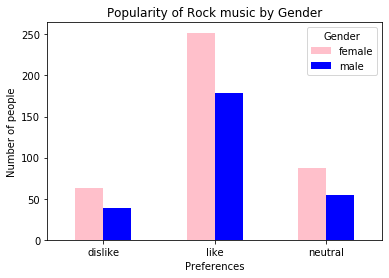

In [8]:
#Gender and music preferences
#Gender and Rock
gender_v_rock =research2.groupby(['Rock', 'Gender'])['Rock'].count().unstack('Gender').plot(kind='bar', color=["pink","blue"])

# adding labels
plt.title('Popularity of Rock music by Gender')
plt.ylabel('Number of people')
plt.xlabel('Preferences')
plt.xticks(rotation='horizontal')

gender_v_rock

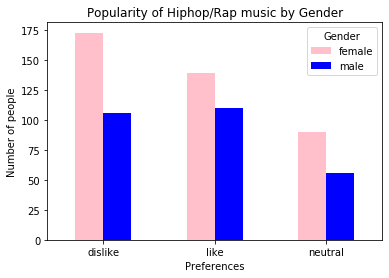

In [9]:
#Gender and music preferences
#Gender and Hip Hop/Rap
gender_v_Hiphop =research2.groupby(['Hiphop_Rap', 'Gender'])['Hiphop_Rap'].count().unstack('Gender').plot(kind='bar', color=["pink","blue"])

# adding labels
plt.title('Popularity of Hiphop/Rap music by Gender')
plt.ylabel('Number of people')
plt.xlabel('Preferences')
plt.xticks(rotation='horizontal')

gender_v_Hiphop

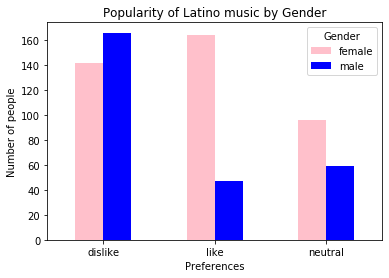

In [10]:
#Gender and music preferences
#Gender and Latin
gender_v_latino =research2.groupby(['Latino', 'Gender'])['Latino'].count().unstack('Gender').plot(kind='bar', color=["pink","blue"])

# adding labels
plt.title('Popularity of Latino music by Gender')
plt.ylabel('Number of people')
plt.xlabel('Preferences')
plt.xticks(rotation='horizontal')

gender_v_latino

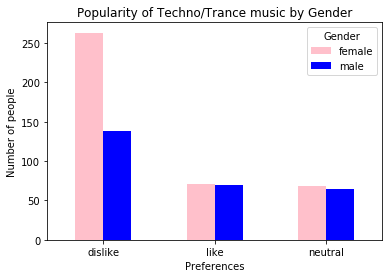

In [11]:
#Gender and music preferences
#Gender and Techno/Trance(EDM)
gender_v_techno =research2.groupby(['Techno_Trance', 'Gender'])['Techno_Trance'].count().unstack('Gender').plot(kind='bar', color=["pink","blue"])

# adding labels
plt.title('Popularity of Techno/Trance music by Gender')
plt.ylabel('Number of people')
plt.xlabel('Preferences')
plt.xticks(rotation='horizontal')

gender_v_techno

### **Research Question 3**
Does a person's preference for Pop, Rock, HipHop/Rap, Latin and Techno music differ based on their age?

In [13]:
# Age and music preferences
#Age and Pop
# making sure our intervals are right 
buckets = [15,19,25,30]
age_cut= pd.cut(research2['Age'], buckets)
age_cut.head()

0    (19, 25]
1    (15, 19]
2    (19, 25]
3    (19, 25]
4    (19, 25]
Name: Age, dtype: category
Categories (3, interval[int64]): [(15, 19] < (19, 25] < (25, 30]]

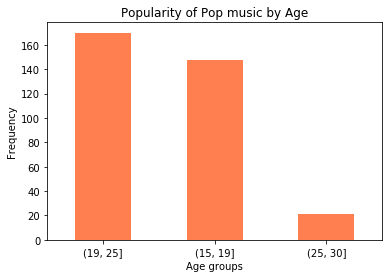

In [14]:
research2['age_group']= pd.cut(research2['Age'], bins=[15,19,25,30])
# call the coloumn to make sure intervals are correct
# research2['age_group']

pop_likes_df = research2[research2['Pop'] == 'like']
# calling the Pop colomn values that only equal like, and running it to make sure it prints correctly
# pop_likes_df

age_v_pop =pop_likes_df['age_group'].value_counts().plot(kind='bar', color='coral')

# labels
plt.title('Popularity of Pop music by Age')
plt.ylabel('Frequency')
plt.xlabel('Age groups')
plt.xticks(rotation='horizontal')

age_v_pop

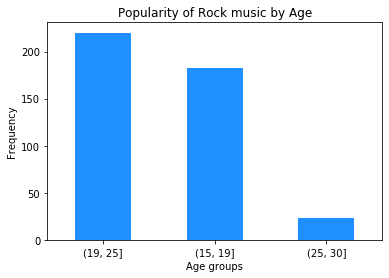

In [15]:
rock_likes_df = research2[research2['Rock'] == 'like']
# calling the Pop colomn values that only equal like, and running it to make sure it prints correctly
# rock_likes_df

age_v_rock =rock_likes_df['age_group'].value_counts().plot(kind='bar', color='dodgerblue')

# labels
plt.title('Popularity of Rock music by Age')
plt.ylabel('Frequency')
plt.xlabel('Age groups')
plt.xticks(rotation='horizontal')
age_v_rock


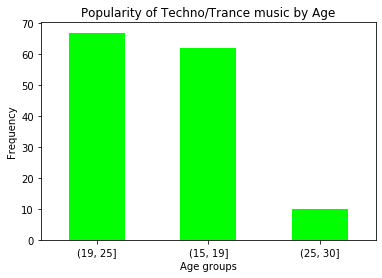

In [16]:
Techno_likes_df = research2[research2['Techno_Trance'] == 'like']
# calling the Pop colomn values that only equal like, and running it to make sure it prints correctly
# rock_likes_df

age_v_Techno=Techno_likes_df['age_group'].value_counts().plot(kind='bar', color='lime')

# labels
plt.title('Popularity of Techno/Trance music by Age')
plt.ylabel('Frequency')
plt.xlabel('Age groups')
plt.xticks(rotation='horizontal')


age_v_Techno

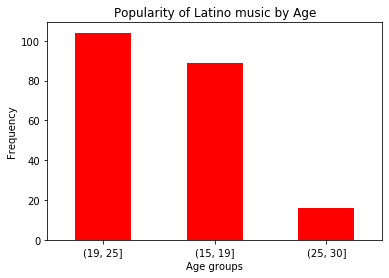

In [17]:
Latino_likes_df = research2[research2['Latino'] == 'like']
# calling the Pop colomn values that only equal like, and running it to make sure it prints correctly
# rock_likes_df

age_v_Latino=Latino_likes_df['age_group'].value_counts().plot(kind='bar', color='red')

# labels
plt.title('Popularity of Latino music by Age')
plt.ylabel('Frequency')
plt.xlabel('Age groups')
plt.xticks(rotation='horizontal')


age_v_Latino

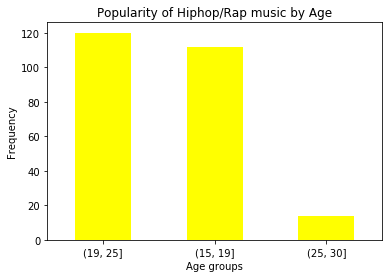

In [18]:
Hiphop_likes_df = research2[research2['Hiphop_Rap'] == 'like']
# calling the Pop coloumn values that only equal like, and running it to make sure it prints correctly
# rock_likes_df

age_v_Hiphop=Hiphop_likes_df['age_group'].value_counts().plot(kind='bar', color='yellow')

# labels
plt.title('Popularity of Hiphop/Rap music by Age')
plt.ylabel('Frequency')
plt.xlabel('Age groups')
plt.xticks(rotation='horizontal')


age_v_Hiphop

### **Research Question 4**
Can a person's preference for Pop, Rock, HipHop/Rap, Latin and Techno music determine their preference for Action, Animated, SciFi, Romantic, Comedy movies?

In [29]:
# creating a new dataframe with selected columns
research3 = research.iloc[:,2:12]
research3.head()


,Pop,Rock,Hiphop_Rap,Latino,Techno_Trance,Comedy,Romantic,Sci-fi,Animated,Action
0,5,5,1,1,1,5,4,4,5,2
1,3,5,1,2,1,4,3,4,5,4
2,3,5,1,5,1,4,2,4,5,1
3,5,3,5,4,2,5,2,3,4,4
4,2,5,4,3,1,5,2,3,3,4


                    Pop      Rock  Hiphop_Rap    Latino  Techno_Trance  \
Pop            1.000000 -0.043662    0.293387  0.281049       0.174364   
Rock          -0.043662  1.000000   -0.209140 -0.047623      -0.096778   
Hiphop_Rap     0.293387 -0.209140    1.000000  0.138688       0.290704   
Latino         0.281049 -0.047623    0.138688  1.000000       0.108900   
Techno_Trance  0.174364 -0.096778    0.290704  0.108900       1.000000   
Comedy         0.221265 -0.021389    0.193457  0.091957       0.101894   
Romantic       0.311570 -0.018553    0.098636  0.314346       0.011797   
Sci-fi        -0.017939  0.125662    0.000602 -0.103876       0.173416   
Animated       0.106134  0.182837   -0.024536  0.169417       0.049604   
Action         0.064727  0.012234    0.162168 -0.078536       0.143894   

                 Comedy  Romantic    Sci-fi  Animated    Action  
Pop            0.221265  0.311570 -0.017939  0.106134  0.064727  
Rock          -0.021389 -0.018553  0.125662  0.182837

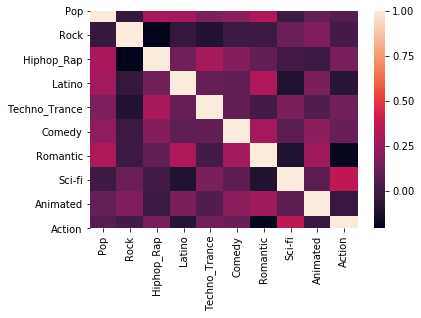

In [30]:
corr = research3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
print(corr)

### **Research Question 5**
Can a person's spending habits influence their preference for Pop, Rock, HipHop/Rap, Latin and Techno music?

In [33]:
# https://stackoverflow.com/questions/29221502/pandas-selecting-discontinuous-columns-from-a-dataframe

research4 = pd.concat([research.iloc[:,2:7],research.iloc[:,12:17]], axis=1)
research4

,Pop,Rock,Hiphop_Rap,Latino,Techno_Trance,Finances,Shopping_centres,Entertainment_spending,Spending_on_looks,Spending_on_gadgets
0,5,5,1,1,1,3,4,3,3,1
1,3,5,1,2,1,3,4,4,2,5
2,3,5,1,5,1,2,4,4,3,4
3,5,3,5,4,2,4,3,3,3,2
4,2,5,4,3,1,2,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...
669,3,3,5,2,5,4,3,4,4,4
670,4,4,4,3,3,3,5,3,4,3
671,3,4,3,1,1,1,2,2,2,2
672,3,4,2,2,2,3,2,5,3,3


                             Pop      Rock  Hiphop_Rap    Latino  \
Pop                     1.000000 -0.043662    0.293387  0.281049   
Rock                   -0.043662  1.000000   -0.209140 -0.047623   
Hiphop_Rap              0.293387 -0.209140    1.000000  0.138688   
Latino                  0.281049 -0.047623    0.138688  1.000000   
Techno_Trance           0.174364 -0.096778    0.290704  0.108900   
Finances                0.038729 -0.019486   -0.074241  0.065314   
Shopping_centres        0.284569 -0.109653    0.152168  0.121281   
Entertainment_spending -0.052005  0.061524    0.131637 -0.098175   
Spending_on_looks       0.207427 -0.125001    0.238930  0.074734   
Spending_on_gadgets     0.063326 -0.000425    0.153413 -0.113511   

                        Techno_Trance  Finances  Shopping_centres  \
Pop                          0.174364  0.038729          0.284569   
Rock                        -0.096778 -0.019486         -0.109653   
Hiphop_Rap                   0.290704 -0.074

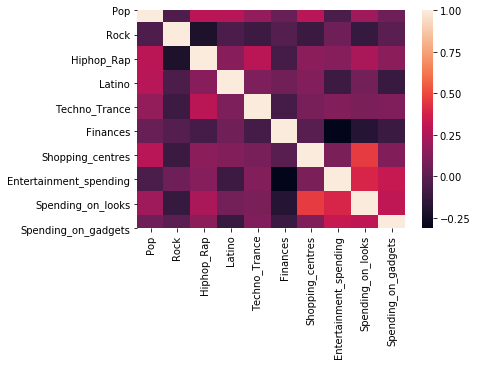

In [32]:
corr = research4.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
print(corr)

### **Research Question 6**
Can a person's living environment affect their preference for Pop, Rock, HipHop/Rap, Latin and Techno music?

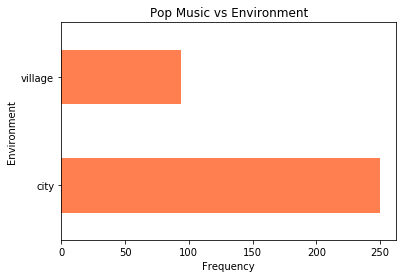

In [10]:
pop_likes_df = research2[research2['Pop'] == 'like']
# calling the Pop coloumn values that only equal like, and running it to make sure it prints correctly
# pop_likes_df

pop_v_envir =pop_likes_df['Village-town'].value_counts().plot(kind='barh', color= 'coral')

# labels
plt.title('Pop Music vs Environment')
plt.ylabel('Environment')
plt.xlabel('Frequency')
plt.xticks(rotation='horizontal')

pop_v_envir

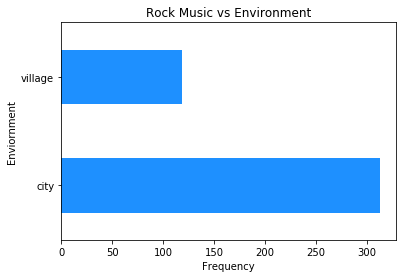

In [36]:
rock_likes_df = research2[research2['Rock'] == 'like']

rock_v_envir =rock_likes_df['Village-town'].value_counts().plot(kind='barh', color= 'dodgerblue')

# labels
plt.title('Rock Music vs Environment')
plt.ylabel('Enviornment')
plt.xlabel('Frequency')
plt.xticks(rotation='horizontal')

rock_v_envir

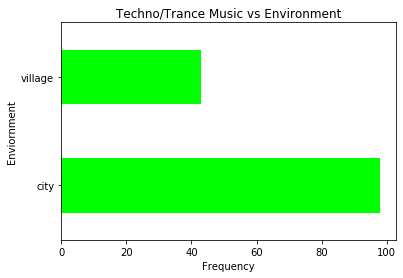

In [37]:
Techno_likes_df = research2[research2['Techno_Trance'] == 'like']

techno_v_envir =Techno_likes_df['Village-town'].value_counts().plot(kind='barh', color= 'lime')

# labels
plt.title('Techno/Trance Music vs Environment')
plt.ylabel('Enviornment')
plt.xlabel('Frequency')
plt.xticks(rotation='horizontal')

techno_v_envir

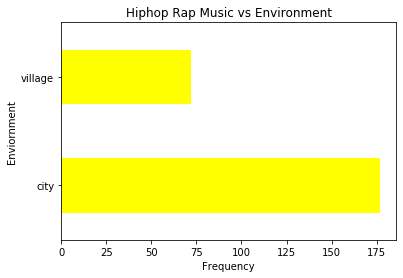

In [38]:
Hiphop_likes_df = research2[research2['Hiphop_Rap'] == 'like']

Hiphop_v_envir =Hiphop_likes_df['Village-town'].value_counts().plot(kind='barh', color= 'yellow')

# labels
plt.title('Hiphop Rap Music vs Environment')
plt.ylabel('Enviornment')
plt.xlabel('Frequency')
plt.xticks(rotation='horizontal')

Hiphop_v_envir

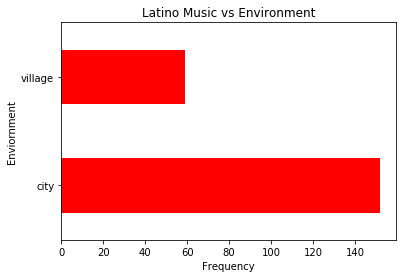

In [39]:
Latino_likes_df = research2[research2['Latino'] == 'like']

Latino_v_envir =Latino_likes_df['Village-town'].value_counts().plot(kind='barh', color= 'red')

# labels
plt.title('Latino Music vs Environment')
plt.ylabel('Enviornment')
plt.xlabel('Frequency')
plt.xticks(rotation='horizontal')

Latino_v_envir

### **Answers to Research Questions**
1. How does our data on music preference compare to Billboards?
    - According to our data, Rock and Pop music are the most popular music generes, with 31.6% and 24.5%, respectively.
    - Billbooard ranks Pop and HipHop as the most popular, with 39% and 35%, respectively.
    - It is interesting to see Rock lead our data as the most popular, however, this might take into account our limited data set.
    
    
2. Does a person's preference for Pop, Rock, HipHop/Rap, Latin and Techno music differ based on their gender?
    - Overall, females prefer the generes of Pop, Rock, HipHop/Rap, Latin and Techno more than males. The only excpetion is for Techno, where males and females prefer the genre about the same. 
    - Males dislike Latino music the most, while females dislike Techno the most.
    - Both males and females prefer Rock the most, out of the parameters we set.
    - Based on this data, we think it is interesting that males and females have similar music preferences.


3. Does a person's preference for Pop, Rock, HipHop/Rap, Latin and Techno music differ based on their age?
    - 19 to 25 year olds prefer Pop, Rock, HipHop/Rap, Latin and Techno music to any other age group (15-19, 25-30).
    - 25 to 30 years olds prefer these genres the least.
    - The preference for these upbeat music genres seems appropriate for 19 to 25 year olds, as this is the time where many individuals in this age bracket attend large social gatherings. 


4. Can a person's preference for Pop, Rock, HipHop/Rap, Latin and Techno music determine their preference for Action, Animated, SciFi, Romantic, Comedy movies?
    - The highest correlation is between Latino music and Romantic movies, with a correlation of 0.314.
    - The second highest correlation is between Pop music and Romantic movies, with a correlation of 0.312.
    - These results indicate that the advertising of certain movies can be based on their music taste: Individuals who listen to Latino and Pop music should be fed advertisments for Romantic movies.
    - We would deploy our results for the reationship between Pop, Rock, HipHop/Rap, Latin and Techno music and Action, Animated, SciFi, Romantic, Comedy movies because they are statistically significant. 
    
  
5. Can a person's spending habits influence their preference for Pop, Rock, HipHop/Rap, Latin and Techno music?
    - The highest correlation found is between shopping at shopping centers (ie: target and wallmart)and Pop music, with a correlation of 0.28.
    - We had originally hypothesized that entertainment spending and HipHop/Rap music would have a large correlation, so it was interesting to see an unanticipated correlation.
    - These results indicate that the advertising of certain movies to individuals could based on their spending habits.
    - We would deploy our results based on the positive correlation.
  

6. Can a person's living environment affect their preference for Pop, Rock, HipHop/Rap, Latin and Techno music?
    - Individuals living in the city prefer Pop, Rock, HipHop/Rap, Latin and Techno music more than those living in a village. 
    - This correlation seems acceptable due to cities typically having greater access to music and nightlife. 
    
    
### **Possible Conclusions**
The correlations we were able to determine based on our data tell us that a person's taste in music could determine them as a target for certain movie marketing. In additon, a person's taste in music can be determined by several aspects. 'Tao's Tempo' could use these correlations in order to better target adolescences, in order to help grow their new business.



### **Future Learnings**
In our next iteration of resarch we would like to see if 'Tao's Tempo' could increase their business by providing premium and nonpremium memberships, which areas of the world they are most popular, and the time of day music is most popularly streamed on their platform. We would also be interested in knowing if the streaming is taking place via a computer or a mobile device. 

We would also be interested in narrowing the scope of one of our research questions. The addition of age and gender contrains with research question 4: "Can a person's preference for Pop, Rock, HipHop/Rap, Latin and Techno music determine their preference for Action, Animated, SciFi, Romantic, Comedy movies?", may have a positive impact with correlations. 